# Homework 4 Part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Problem 1

**Consider the following network: 1 input layer, 1 hidden layer and 1 output layer, each layer with 2 neurons.**

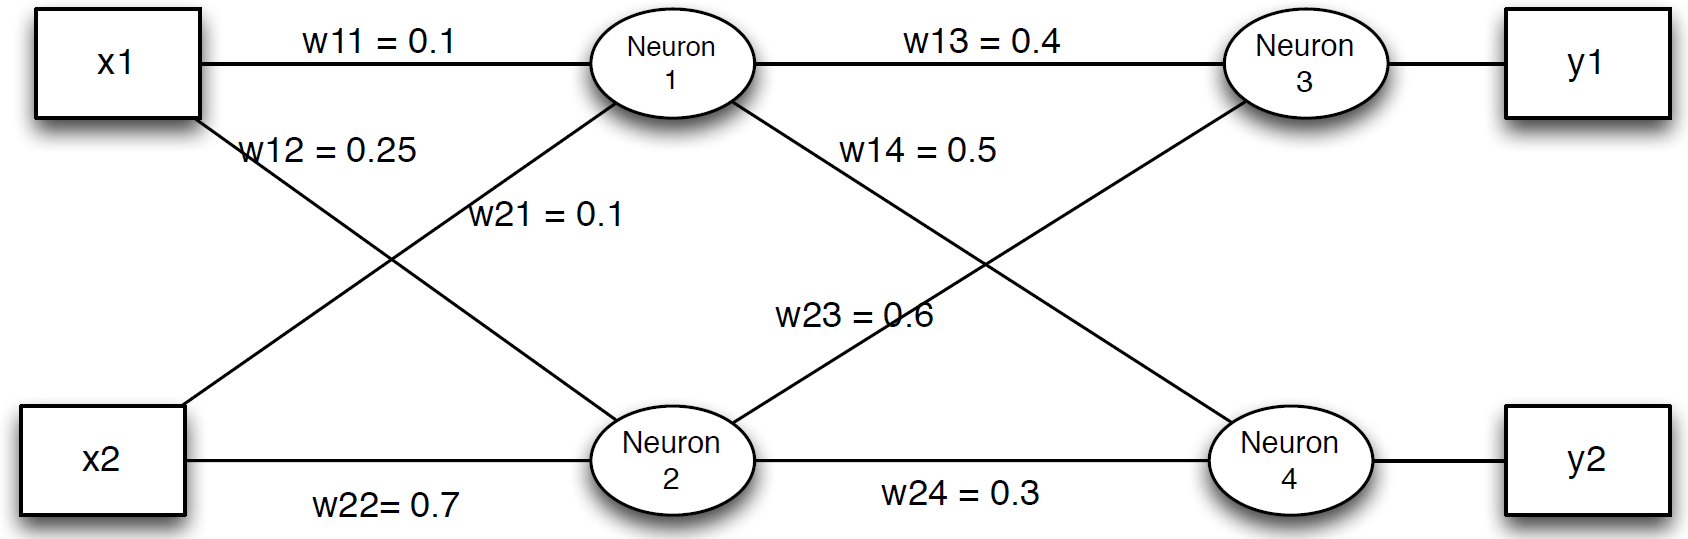

In [2]:
from IPython.display import Image
Image('network.png', width=900)

**All weights are initialized to the values shown (and there are no biases for simplicity). Consider the data point $x=[1,1]^T$ with desired output vector $d=[1,0]^T$. Complete one iteration of backpropagation by hand assuming a learning rate of $\eta=0.1$.**

**What would all the weight values be after one backpropagation iteration? Show your work.**

**Use the sigmoid activation function: $\phi(x) = \frac{1}{1 + e^{-x}}$. Note that $\frac{d\phi(x)}{dx}=\phi'(x) = \phi(x)(1-\phi(x))$.**

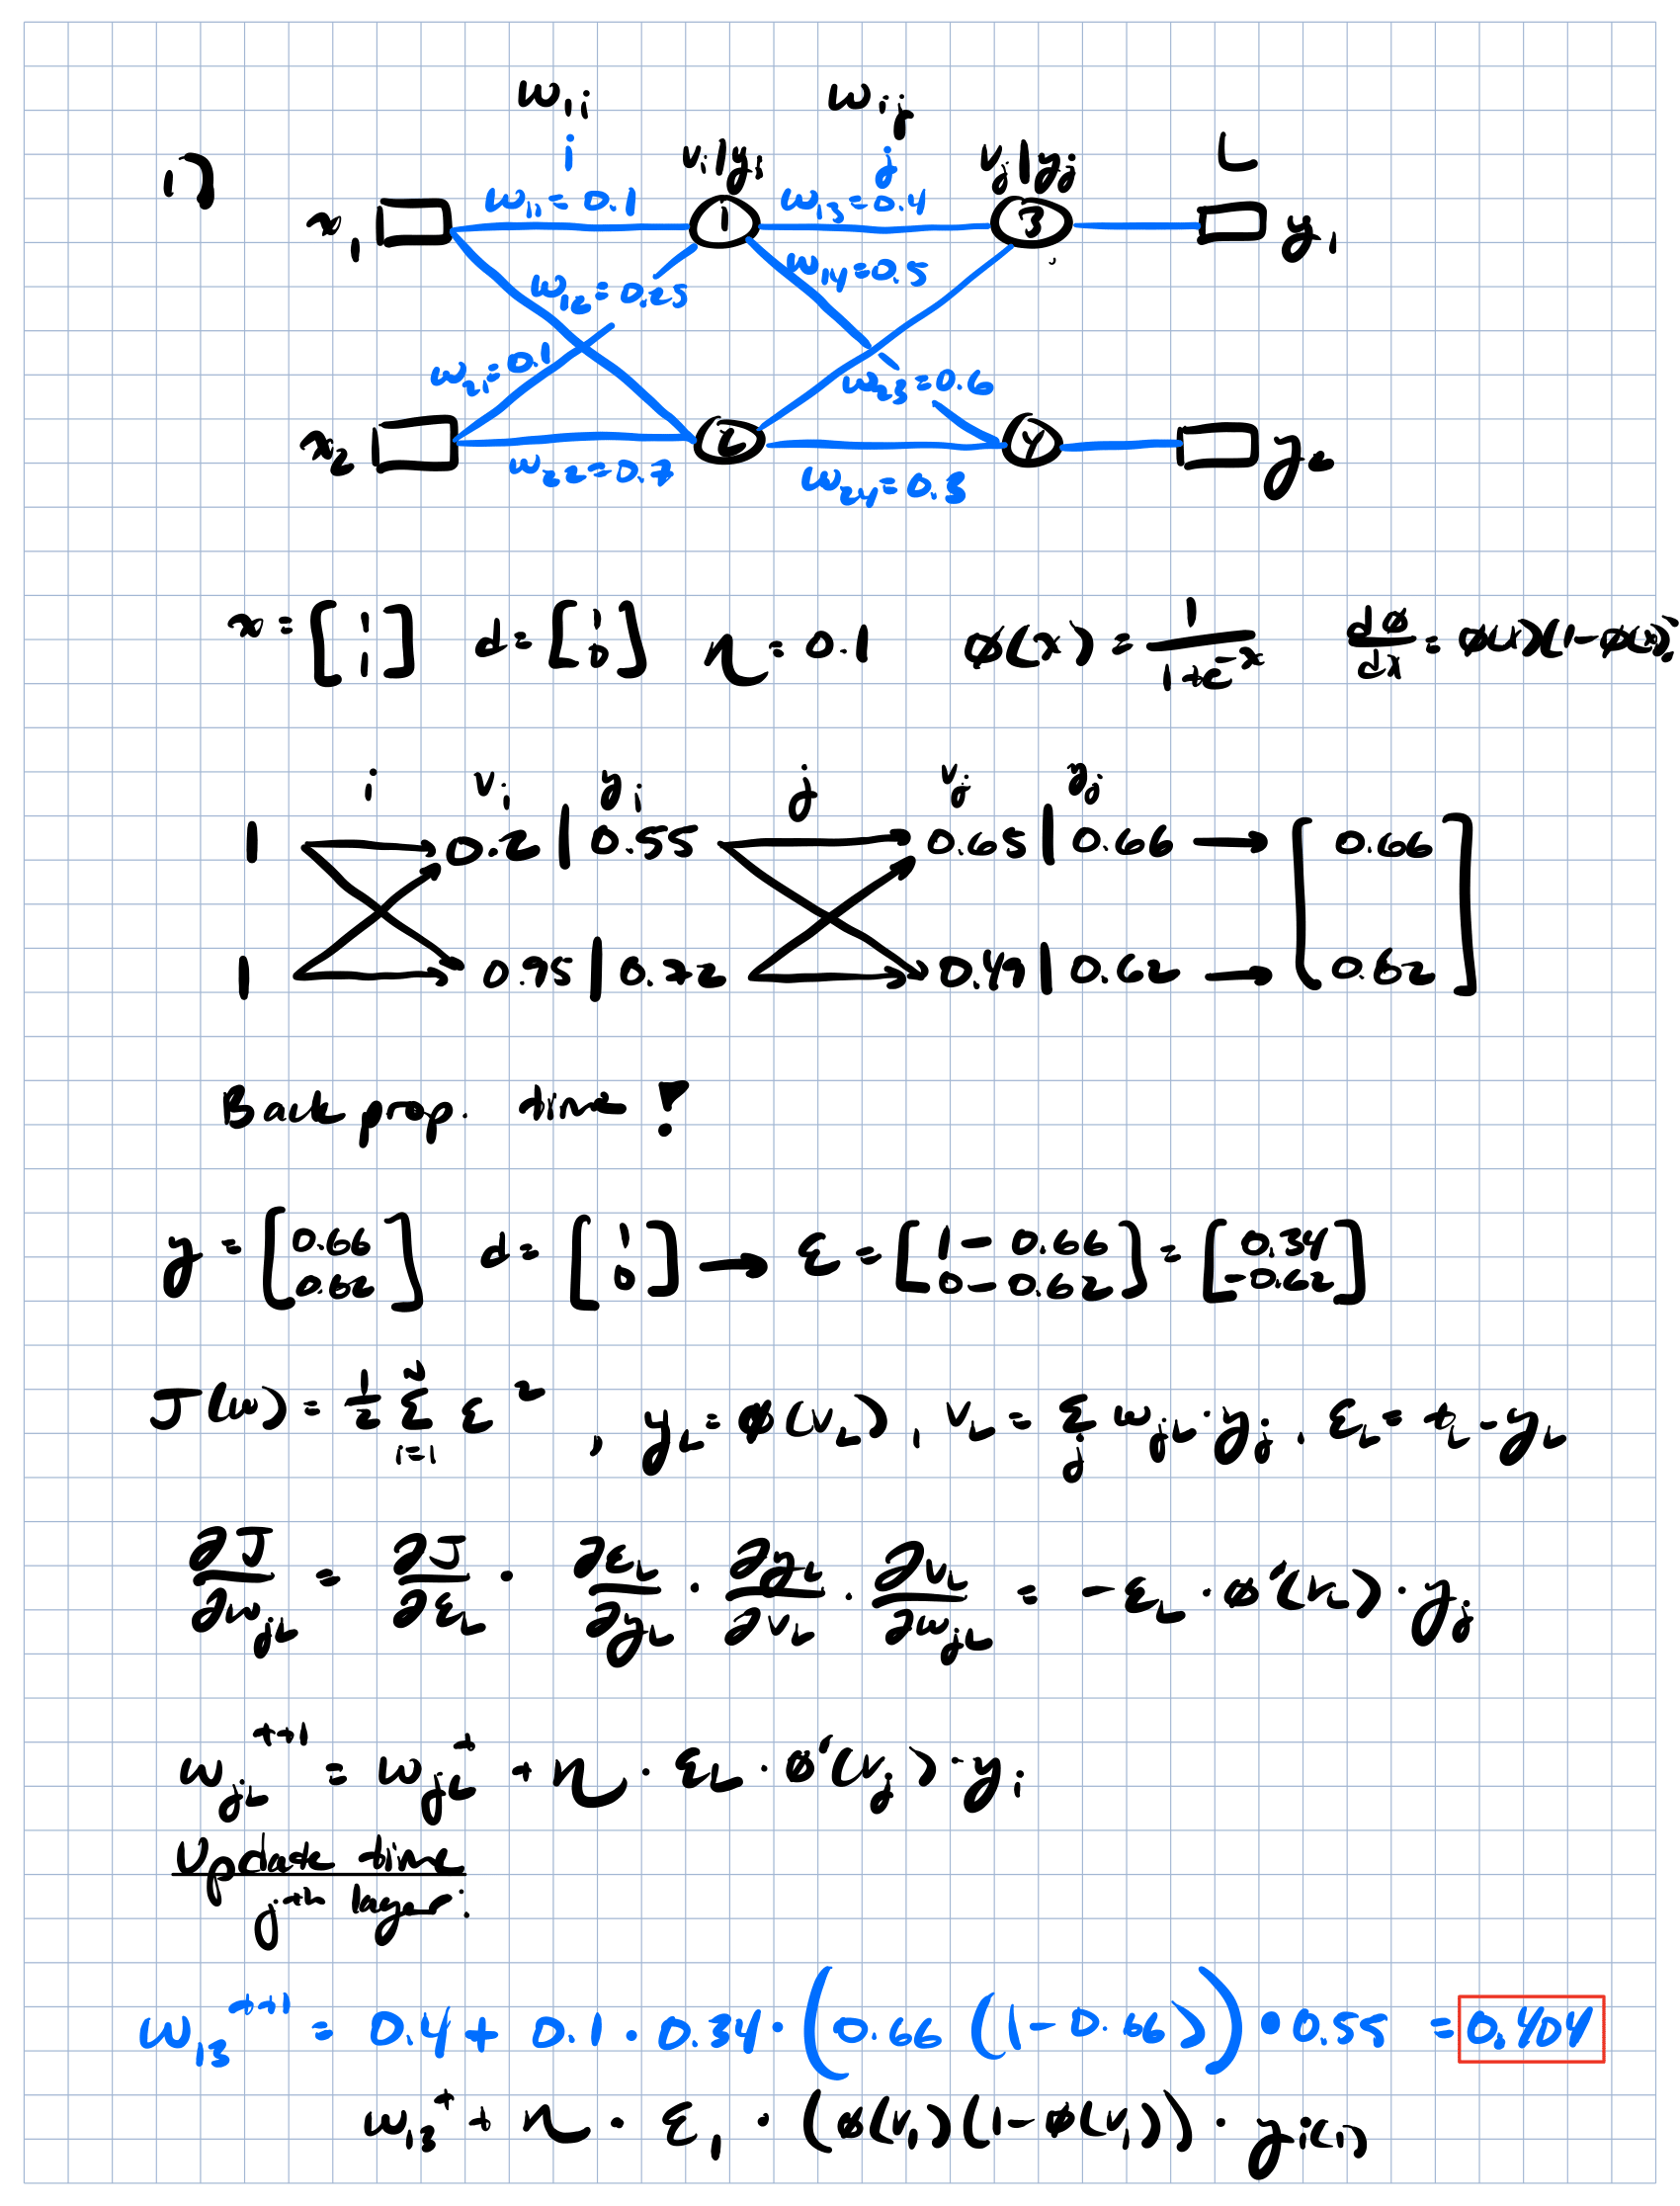

In [5]:
Image('figures/HW_4-2.png',width=600)

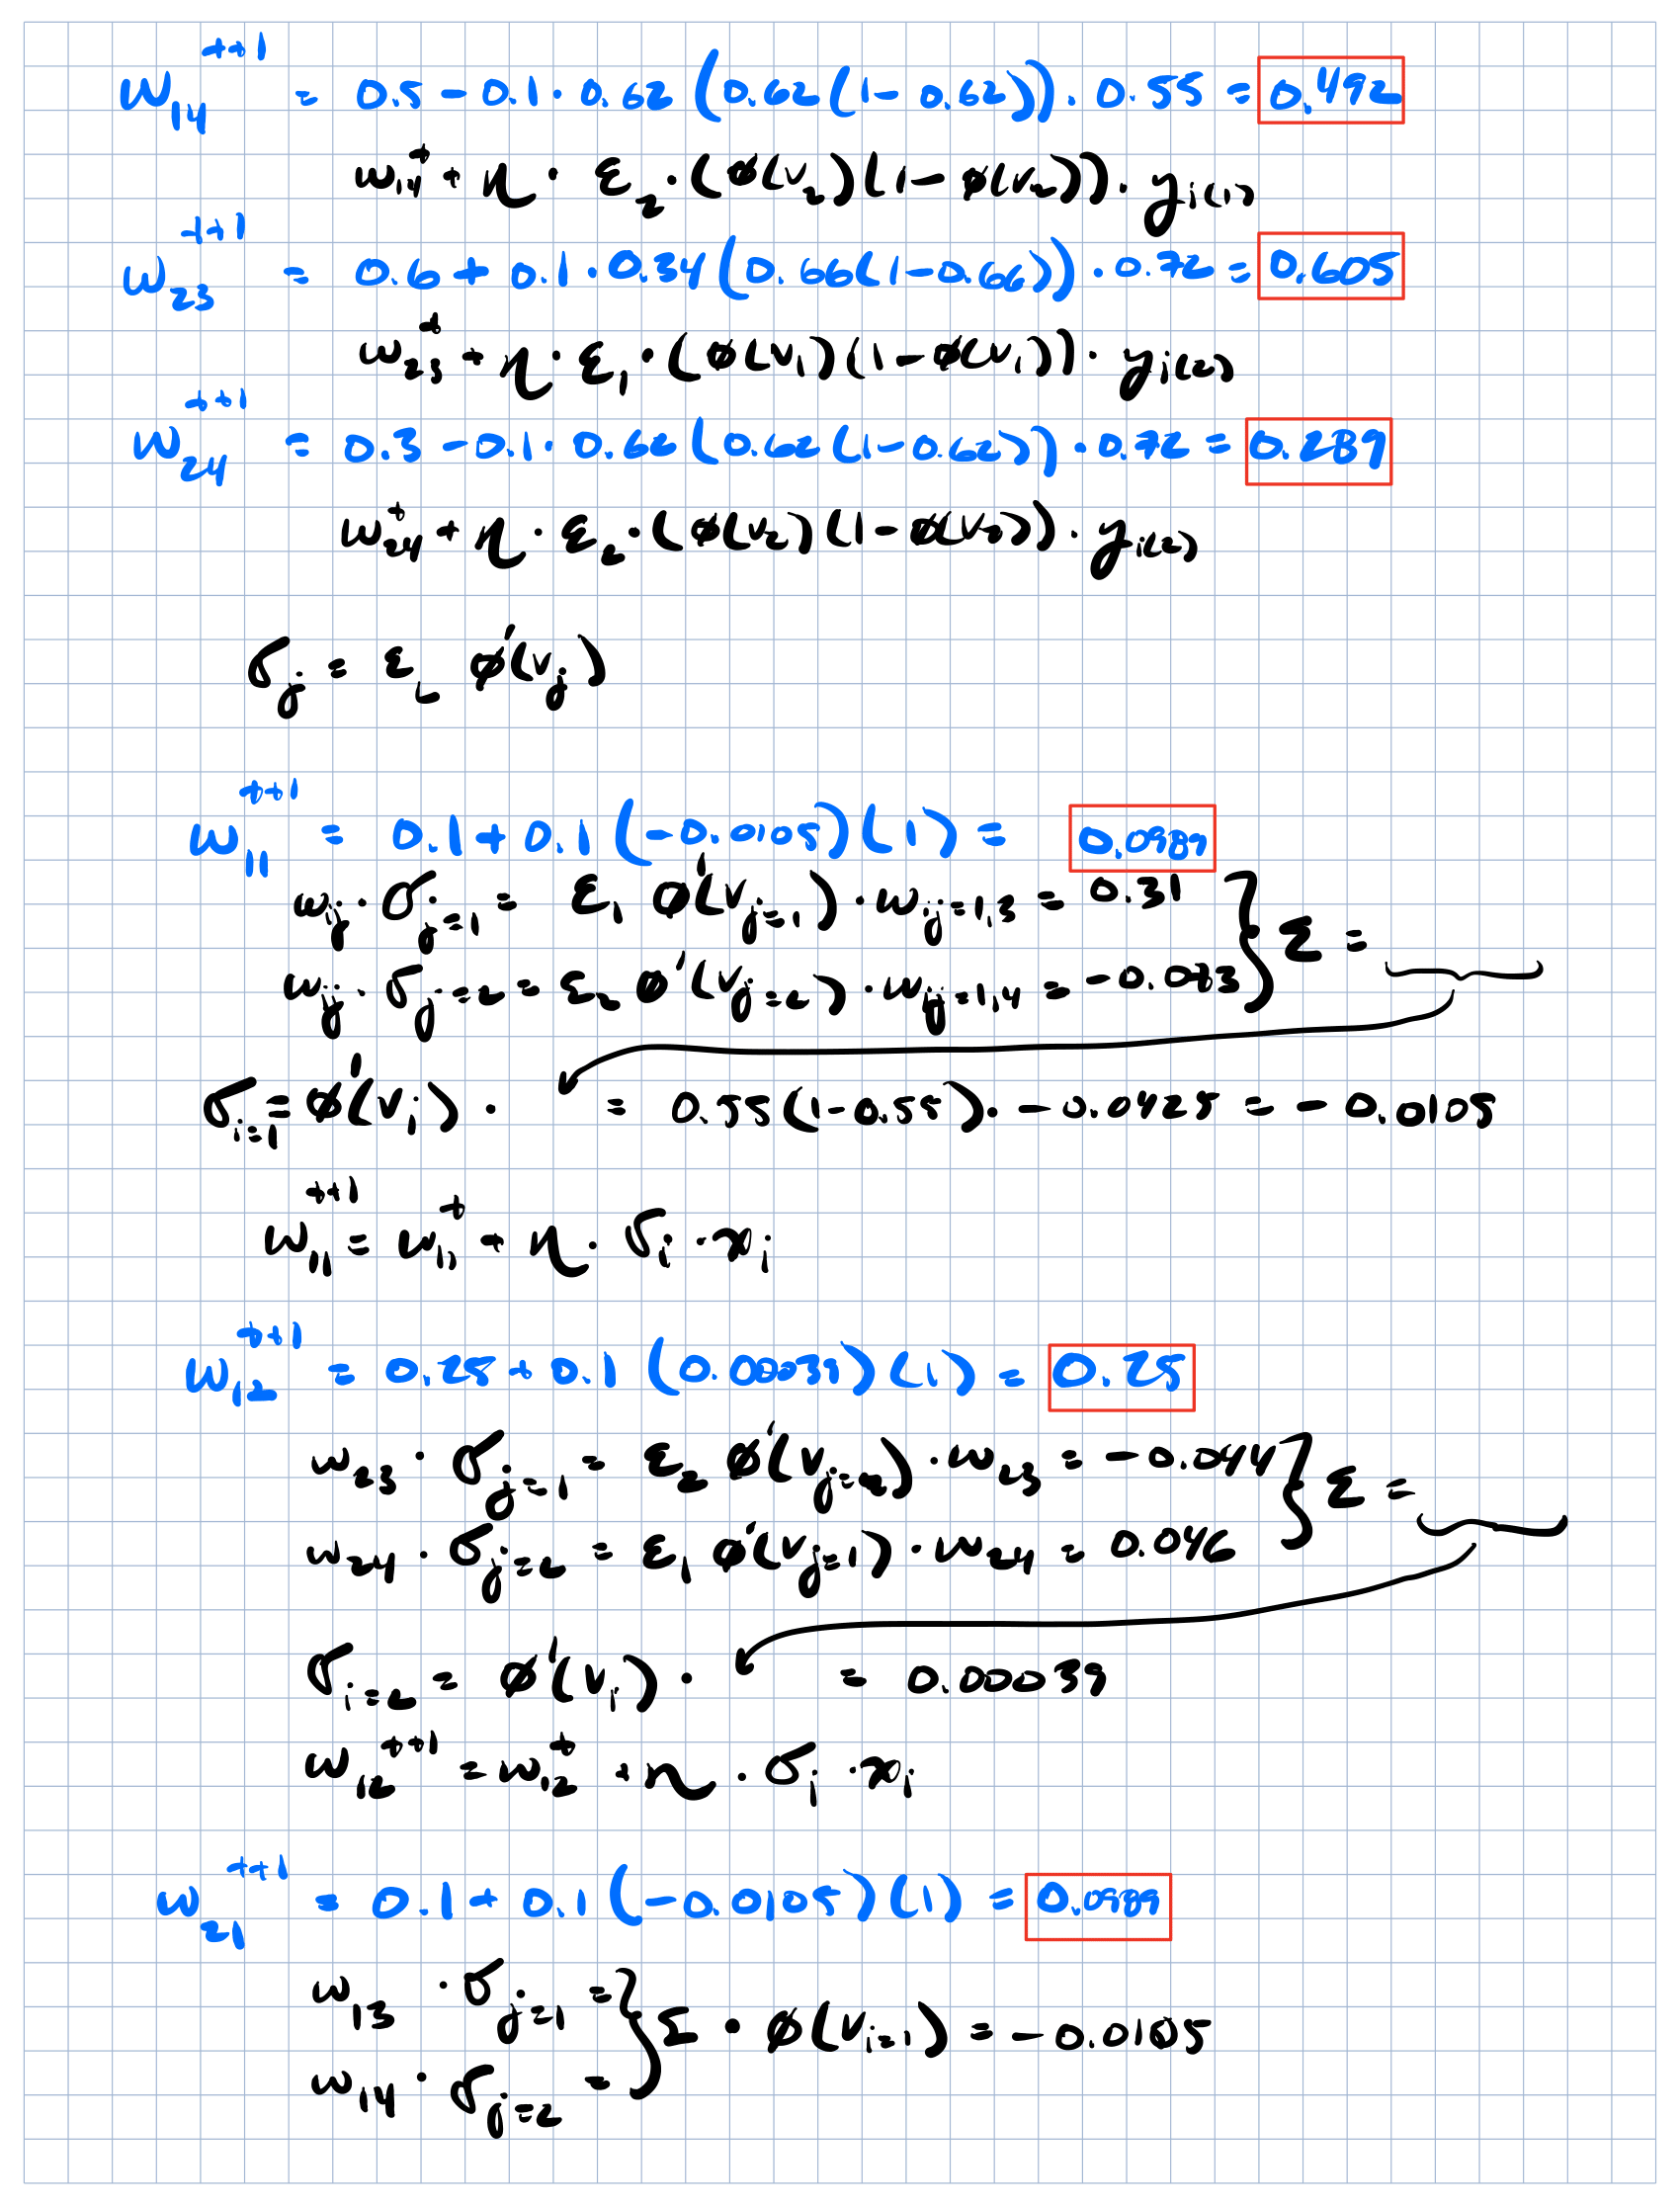

In [6]:
Image('figures/HW_4-3.png',width=600)

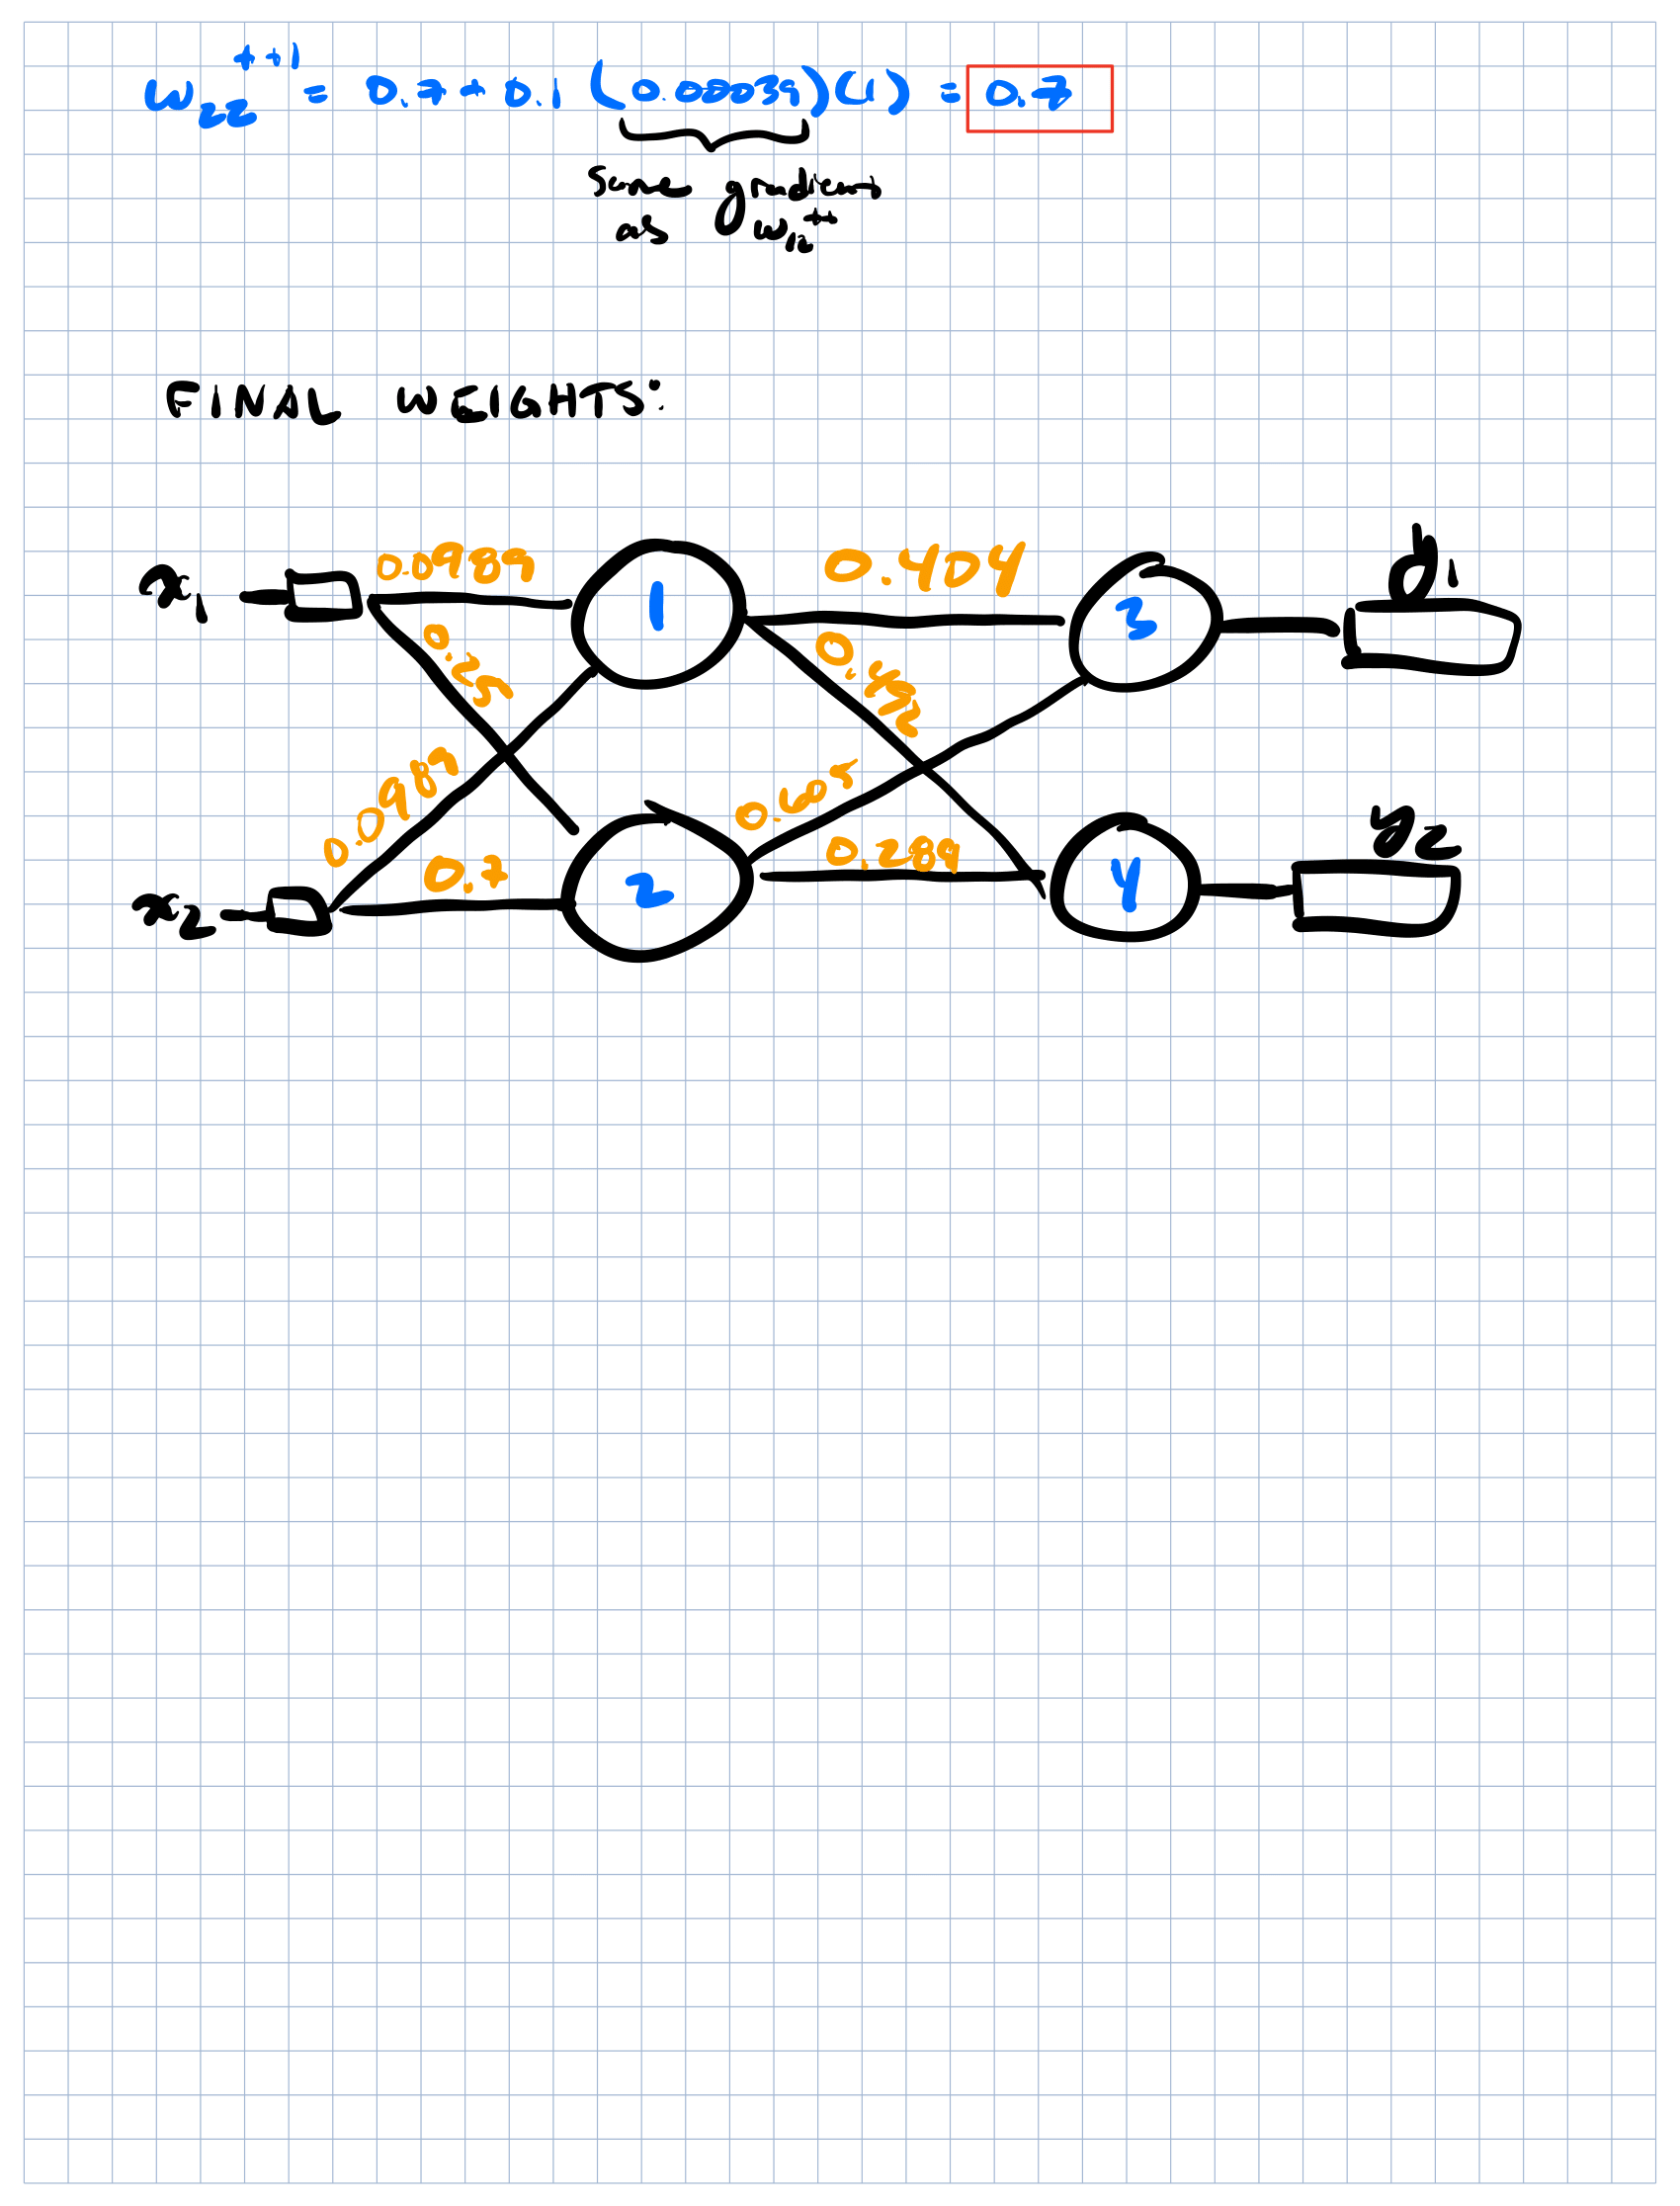

In [7]:
Image('figures/HW_4-4.png',width=600)

___

# Problem 2

**In this problem you will be working with the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine) from the UCI ML Repository. It consists of 178 wine samples with 13 features describing their different chemical properties. Let's load the data:**

In [6]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                   'Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**Use the Logistic Regression algorithm with Lasso (or L1) regularizer to perform classification on this dataset.**

* **When using ```sklearn.linear_model.LogisticRegression```, be sure to use the appropriate ```solver``` that allows for L1 penalty (read documentation).**

* **Select a value for the regularizer weight (parameter ```C```).**

* **For each class, visualize the weight coefficients for each feature (use the attribute ```coef_```) and the bias term (use the attribute ```intercept_```).**

**To successfully train and evaluate your classifier, make sure to: (1) pre-process the data, (2) partition the data with 70% training and 30% testing.**

**In your answer, include:**

1. **Create a plot that visualizes the learned weight coefficient for each feature (y-axis) as the value for the parameter $C$ changes. Consider only coefficients for class with label 2. It may be useful to visualize this plot in log-scale.**

In [7]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [8]:
labels = df_wine["Class label"]
features = df_wine.iloc[:,1:]
labels.shape, features.shape

((178,), (178, 13))

In [9]:
x_train, x_test, labels_train, labels_test = train_test_split(features, labels, train_size=0.7)

(3, 13)


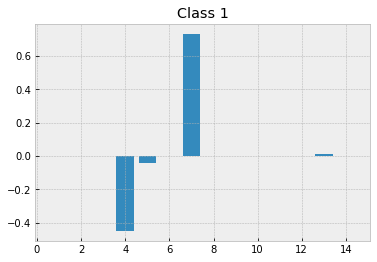

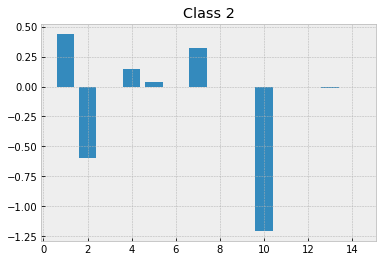

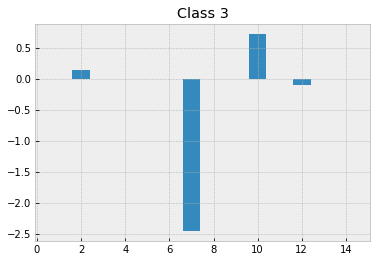

In [25]:
C = 0.3
log_reg = lr(penalty="l1", solver="liblinear", C=C).fit(x_train, labels_train)
coef = log_reg.coef_
print(coef.shape)
intercept = log_reg.intercept_
for k in log_reg.classes_-1:
    plt.bar(np.linspace(1,13,13), coef[k])
    plt.bar(14, intercept[k])
    plt.title(f"Class {k+1}")
    plt.show()

In [26]:
C = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.5, 3]

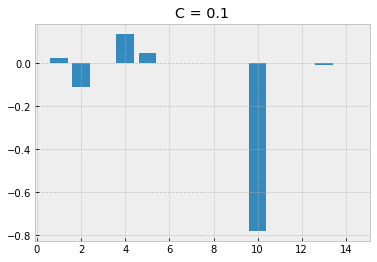

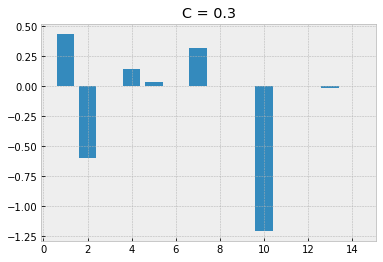

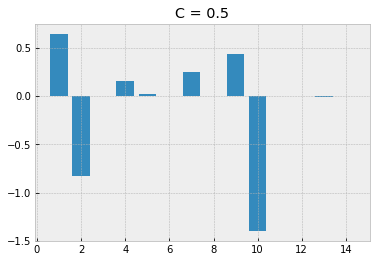

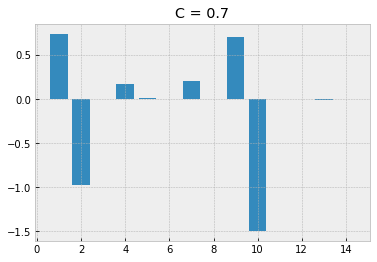

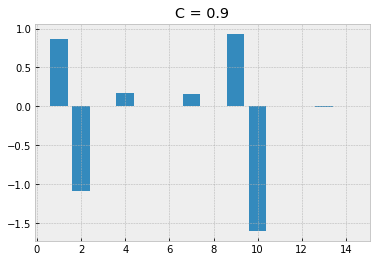

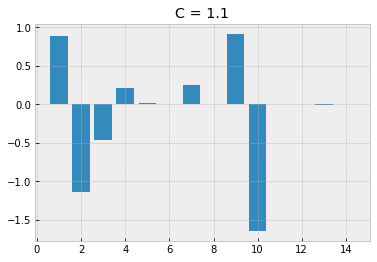

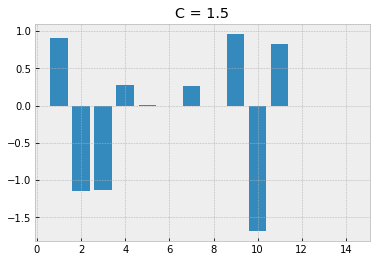

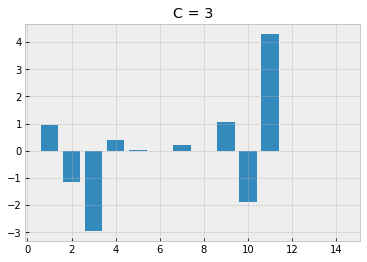

In [27]:
for c in C:
    log_reg = lr(penalty="l1", solver="liblinear", C=c).fit(x_train, labels_train)
    coef = log_reg.coef_
    intercept = log_reg.intercept_
    plt.bar(np.linspace(1,13,13), coef[1])
    plt.bar(14, intercept[1])
    plt.title(f"C = {c}")
    plt.show()

2. **Specify the weights and bias parameters of the discriminant function when $C=0.5$. Which features were *selected*?**

In [193]:
C=0.5
log_reg = lr(penalty="l1", solver="liblinear", C=C).fit(x_train, labels_train)
coef = log_reg.coef_
inter = log_reg.intercept_
for k in log_reg.classes_-1:
    print(coef[k], " ", inter[k])

[-0.20603874  0.13178129  0.         -0.54657758 -0.00974167  0.
  1.05213857  0.          0.          0.          0.          0.
  0.01388035]   0.0
[ 0.58721541 -0.91354698  0.          0.19583247  0.01774915  0.
  0.76479163  0.          0.         -1.53874167  0.          0.
 -0.00922236]   0.0
[ 0.00000000e+00  4.99478319e-01  0.00000000e+00  0.00000000e+00
 -5.88549049e-04  0.00000000e+00 -2.30504899e+00  0.00000000e+00
  0.00000000e+00  8.47161218e-01  0.00000000e+00 -7.42444157e-01
 -1.57029232e-03]   0.0


In [200]:
for k in log_reg.classes_-1:
    w = np.where(coef[k] > 0)[0]
    cat = df_wine.columns[w].values
    print("Features selected for Class ", k, ": ")
    print(cat)

Features selected for Class  0 : 
['Alcohol' 'Total phenols' 'OD280/OD315 of diluted wines']
Features selected for Class  1 : 
['Class label' 'Ash' 'Alcalinity of ash' 'Total phenols']
Features selected for Class  2 : 
['Alcohol' 'Proanthocyanins']


3. **For $C=0.5$, compute the accuracy scores and confusion matrices for both training and test sets.**

In [197]:
pred = log_reg.predict(x_test)

In [198]:
acc = accuracy_score(pred, labels_test)

In [199]:
print("ACCURACY C=0.5: ", acc)

ACCURACY C=0.5:  0.9444444444444444


___

# Problem 3

**In this problem you will be working with the Olivetti Faces Dataset. Let's load the data:**

Dataset consists of 400 faces


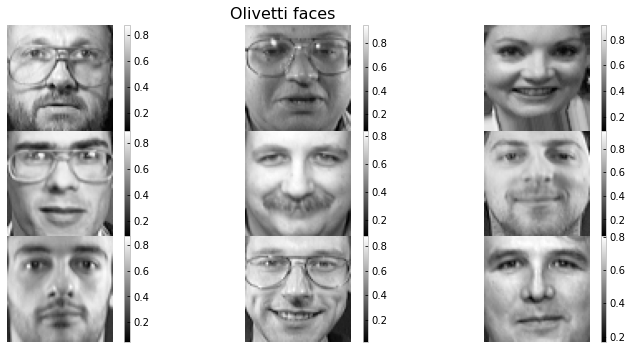

In [7]:
from sklearn.datasets import fetch_olivetti_faces

n_row, n_col = 3, 3
image_shape = (64, 64)

# Load faces 
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
labels = dataset.target
n_samples, n_features = faces.shape

print('Dataset consists of %d faces' % n_samples)

#Define function to plot exampes
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(10,5))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape((64,64))
        plt.imshow(comp,cmap='gray')
        plt.colorbar(); plt.axis('off');
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
plot_gallery("Olivetti faces", faces[:9,:])

**The dataset is stored in ```faces```:**

In [8]:
faces.shape

(400, 4096)

**This is the input matrix of size $N\times D$, where $N=400$ is the number of images and $D=4096$ is the dimensionality of each image (in the pixel space, each image can be reshaped to a $64\times 64$ image).**

**There are 10 samples for each class, and a total of 40 classes (each class is a different person).**

**For example, label 3:**

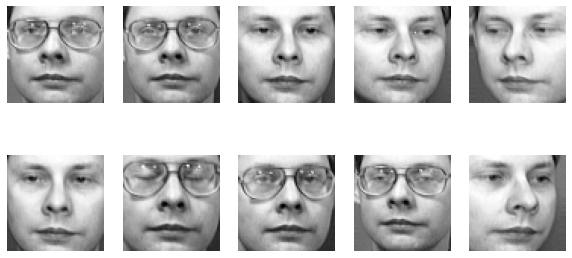

In [9]:
plt.figure(figsize=(10,5))
idx = np.where(labels==3)[0]
for i in range(len(idx)):
    plt.subplot(2,5,i+1)
    plt.imshow(faces[idx[i],:].reshape((64,64)),cmap='gray')
    plt.axis('off');

1. **Partition the data into 80% training and 20% test.**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [35]:
x_train, x_test, labels_train, labels_test = train_test_split(faces, labels, train_size=0.8)

2. **Use PCA to project the data into a 9-dimensional space. Plot the correspondent 9 eigenvectors (*Principal Components* or PCs) for the training set. Describe what these 9 PCs represent. (For image datasets, the principal components are also referred to *eigenfaces*)**
    * **The function "plot_gallery" may be useful for this.**

In [17]:
eigenfaces = PCA(n_components=9).fit(x_train)
eigenfaces.components_.shape

(9, 4096)

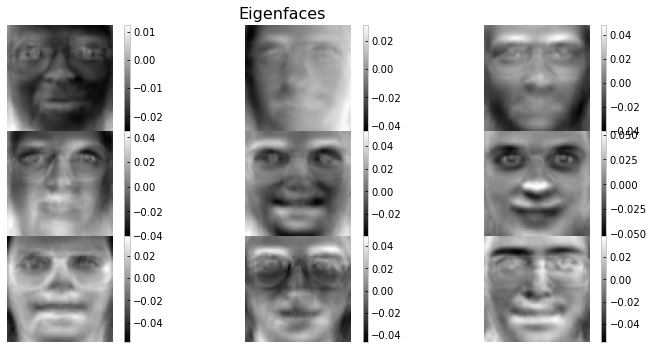

In [49]:
plot_gallery("Eigenfaces", eigenfaces.components_[:9], 3, 3)

The first 9 priniciple components represent the "most important ingredients" for facial reconstruction. The first eigenface represents the most statistically prominent features in the faces that are part of the training dataset and as you stray further and further from the first, you pick up less important features for facial reconstruction, for example you can see that some of the eigenfaces show glasses which means that in the training set, glasses are a prodominant feature and are exhibited in the principle components.

3. **Use PCA to project the data into a 2-dimensional space and plot the results. Comment on the separability of the classes in training.**

In [111]:
eigenfaces_2D = PCA(n_components=2).fit(x_train).transform(x_train)
eigenfaces_2D.shape

(320, 2)

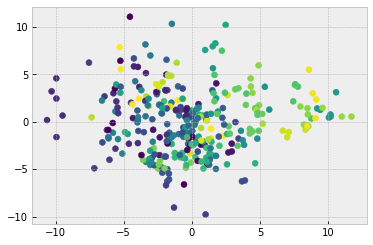

In [112]:
plt.scatter(eigenfaces_2D[:,0], eigenfaces_2D[:,1], c=labels_train)

THe classes don't seem to be very seperable. There are regions that only one class exists in but overall, there is little seperability amoung classes.

4. **Use LDA to project the data into a 2-dimensional space and plot the results. Comment on the separability of the classes, compare it with the PCA results in training.**

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [108]:
faces_lda = lda(n_components=2).fit(x_train, labels_train).transform(x_train)

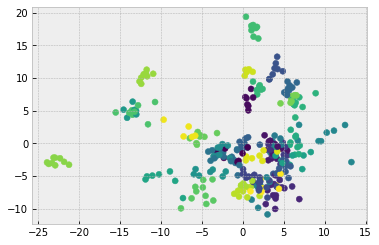

In [109]:
plt.scatter(faces_lda[:,0], faces_lda[:,1], c=labels_train)

These classes look far better seperated than the PCA result. There is a jumbling of classes near the origin however.

5. **Using PCA, what is the minimum number of principal components you need to preserve in order to explain at least 90% of the data?**

In [55]:
total_eigenfaces = PCA().fit(x_train)

In [60]:
explain_var = np.cumsum(total_eigenfaces.explained_variance_ratio_)

In [63]:
np.where(explain_var <= 0.9)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64),)

You would need 62 principle components to explain at least 90% of the data.

6. **Using LDA, what is the minimum number of components you need to preserve in order to explain 90% of the data?**

In [66]:
total_lda_faces = lda().fit(x_train, labels_train)

In [67]:
explained_var_lda = np.cumsum(total_lda_faces.explained_variance_ratio_)

In [69]:
np.where(explained_var_lda <= 0.9)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20], dtype=int64),)

You would need 21 components to explain 90% of the data.

7. **Use the results from parts 5 and 6, to train a $k$-NN classifier with $k=3$. Which set of features performed better?**

In [119]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

In [116]:
pca = PCA(n_components=62).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
lda = lda(n_components=21).fit(x_train, labels_train)
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

In [118]:
knn_pca = knn(n_neighbors=3).fit(x_train_pca, labels_train)
knn_lda = knn(n_neighbors=3).fit(x_train_lda, labels_train)
pca_pred = knn_pca.predict(x_test_pca)
lda_pred = knn_lda.predict(x_test_lda)

In [121]:
pca_acc = accuracy_score(pca_pred, labels_test)
lda_acc = accuracy_score(lda_pred, labels_test)

In [122]:
print("KNN K=5")
print("PCA ACCURACY = ", pca_acc)
print("LDA ACCURACY = ", lda_acc)

KNN K=5
PCA ACCURACY =  0.825
LDA ACCURACY =  0.975


LDA preformed leagues better than PCA. This isn't a big surprise given the class seperability in 2D as shown above. LDA had a much cleaner class seperability and as the dimensionality/components used increases, it only gets better.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.